In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_file(filename):
    return pd.read_csv(filename)

def get_data(timeframe):
    return read_file(r"C:\Users\ayush\Desktop\IITB\ZeltaLabPS\BackTesting\data\data\btcusdt_" + timeframe + "_val.csv")

time_frame = "1h"
# Load data
df = get_data(time_frame)
df.head()


,datetime,open,high,low,close,volume
0,2020-07-24 23:30:00,9557.66,9589.00,9556.00,9580.01,1927.603117
1,2020-07-25 00:30:00,9580.00,9583.80,9560.00,9581.76,1236.182213
2,2020-07-25 01:30:00,9581.76,9620.00,9567.23,9615.29,2119.244392
3,2020-07-25 02:30:00,9615.32,9637.00,9588.08,9591.55,2088.164018
4,2020-07-25 03:30:00,9591.55,9593.46,9522.00,9533.92,2069.404213


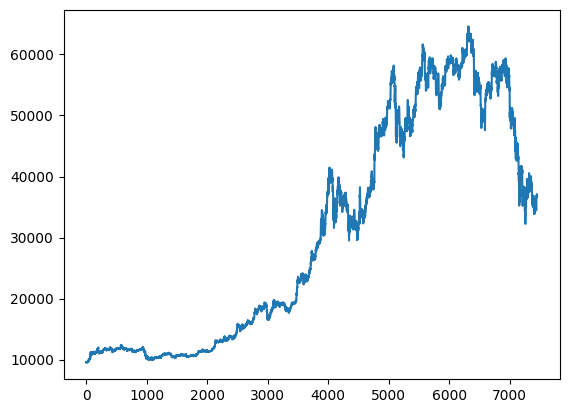

In [27]:
plt.plot(df['close'])

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from numpy import dot
from numpy import sum, tile, linalg, log, pi, exp
from glob import glob
from numpy.linalg import inv, det
import math as m

In [29]:
def calculate_momentum(df, n=10):
    df['Momentum'] = df['close'] - df['close'].shift(n)
    df['Momentum'] = df['Momentum'] / df['close'].shift(n) * 100
    return df

def calculate_roc(df, n=10):
    df['ROC'] = (df['close'] - df['close'].shift(n)) / df['close'].shift(n)
    return df

In [30]:
def calculate_cci(df, n=20, factor=0.0015):
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    sma = typical_price.rolling(window=n).mean()
    mean_deviation = (typical_price - sma).abs().rolling(window=n).mean()
    
    df['CCI'] = (typical_price - sma) / (factor * mean_deviation)
    
    return df

In [31]:
df = calculate_momentum(df)
df = calculate_roc(df)
df = calculate_cci(df)



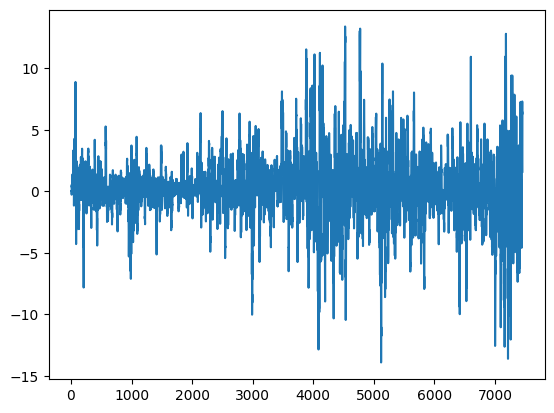

In [32]:
plt.plot(df['Momentum'])

In [33]:
df['change_5'] = df['close'].rolling(window=5).mean().pct_change() * 1e4

df['ret_5'] = df['close'].rolling(window=5).mean().pct_change() * 1e4
df['ret_1'] = df['close'].rolling(window=1).mean().pct_change() * 1e4
df['ret_10'] = df['close'].rolling(window=10).mean().pct_change() * 1e4
df['ret_30'] = df['close'].rolling(window=30).mean().pct_change() * 1e4

df['ret_5'] = df['ret_5'].shift(-5)
df['ret_1'] = df['ret_1'].shift(-1)
df['ret_10'] = df['ret_10'].shift(-10)
df['ret_30'] = df['ret_30'].shift(-30)

df = df.dropna()
df = df.reset_index(drop=True)

In [34]:
rets = ['ret_1',  'ret_10']
aggfunc = ['mean', 'median']
alphas = ['ROC', 'Momentum', 'CCI']

In [35]:
def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'ret_60', 'ret_300', 'tick_10'], aggfunc = ['mean', 'median', 'count'], buckets = 10):
# def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60'], aggfunc = ['mean', 'median', 'count']):
    for alpha in alphas:
        msg = df.pivot_table(index = pd.qcut(df[alpha],buckets,duplicates='drop'), values=rets, aggfunc=aggfunc)
        print(msg)
        
def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'ret_60', 'ret_300']):
# def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10']):
# def print_corrs(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300']):
# def print_corrs(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

In [36]:
print_buckets(df, alphas, rets, aggfunc)
print_corrs(df, alphas, rets)

                          mean               median          
                         ret_1    ret_10      ret_1    ret_10
ROC                                                          
(-0.14, -0.0264]     10.884423 -1.246344  23.748386  2.981981
(-0.0264, -0.0135]   -1.157787  0.081877   7.072171  4.444490
(-0.0135, -0.0067]   -5.192547  1.254290   3.231087  3.006602
(-0.0067, -0.00193]   6.260509  2.621598   6.249881  2.975860
(-0.00193, 0.00214]   4.462340  2.156002   2.455922  1.705924
(0.00214, 0.00594]    2.547331  1.557909   0.930784  1.304681
(0.00594, 0.0107]    -0.909969  0.970436  -3.073016  0.615833
(0.0107, 0.0185]     -0.127882  2.238843  -0.786253  1.141782
(0.0185, 0.0314]     -0.841892  3.869829  -2.611453  1.653622
(0.0314, 0.134]       5.640245  4.242123  -0.461447  2.204774
                       mean               median          
                      ret_1    ret_10      ret_1    ret_10
Momentum                                                  
(-13.905, -2.64] 

In [37]:
df['diff'] = df['high'] - df['low']


In [38]:
df['abs_ret_1'] = df['ret_1'].abs()
df['abs_ret_10'] = df['ret_10'].abs()
df['abs_ret_30'] = df['ret_30'].abs()

abs_rets = ['abs_ret_1', 'abs_ret_10', 'abs_ret_30']

In [39]:
print_buckets(df, ['diff'], abs_rets, aggfunc)
print_corrs(df, ['diff'], abs_rets)

                          mean                           median             \
                     abs_ret_1 abs_ret_10 abs_ret_30  abs_ret_1 abs_ret_10   
diff                                                                         
(-0.001, 49.302]     22.074733   8.404538   5.237561  14.940639   5.539356   
(49.302, 75.536]     30.606340  10.691503   6.381689  22.659834   7.162565   
(75.536, 113.987]    37.296278  12.324161   8.495302  26.232214   8.820017   
(113.987, 184.418]   46.371320  14.765974   9.279989  32.167596  10.101872   
(184.418, 317.615]   54.222563  17.232751  11.346245  39.110969  12.244063   
(317.615, 445.316]   60.948075  19.400323  11.705103  43.391346  14.597133   
(445.316, 571.981]   67.945006  22.004692  13.185792  45.037442  16.398280   
(571.981, 730.136]   69.574576  23.250467  13.770054  54.116944  17.480758   
(730.136, 989.473]   80.595104  24.040437  14.341966  59.691777  17.784468   
(989.473, 8053.39]  110.351911  30.472409  15.061506  75.702739 

In [40]:
acc = df['diff'] * df['ret_10']

In [41]:
df.head(10)

,datetime,open,high,low,close,volume,Momentum,ROC,CCI,change_5,ret_5,ret_1,ret_10,ret_30,diff,abs_ret_1,abs_ret_10,abs_ret_30
0,2020-07-26 13:30:00,9716.53,9788.88,9702.97,9770.04,4049.748207,0.673489,0.006735,1089.109936,19.064992,23.692855,70.552424,14.834305,21.406782,85.91,70.552424,14.834305,21.406782
1,2020-07-26 14:30:00,9770.06,9845.00,9745.00,9838.97,4462.260659,1.428289,0.014283,1477.741548,35.131518,22.579961,167.730972,2.724397,15.263620,100.00,167.730972,2.724397,15.263620
2,2020-07-26 15:30:00,9837.58,10111.00,9837.58,10004.00,16124.322806,3.319783,0.033198,2613.509803,66.916593,-8.486393,-33.116753,-11.701739,23.696570,273.42,33.116753,11.701739,23.696570
3,2020-07-26 16:30:00,10004.01,10006.00,9950.00,9970.87,3658.183159,3.167814,0.031678,2016.148596,55.498536,-15.021408,-92.850473,-9.169182,29.743656,56.00,92.850473,9.169182,29.743656
4,2020-07-26 17:30:00,9970.86,9990.00,9810.50,9878.29,5005.861353,2.155672,0.021557,1163.132022,32.809051,6.241104,9.050149,3.969318,31.669206,179.50,9.050149,3.969318,31.669206
5,2020-07-26 18:30:00,9878.29,9927.46,9863.00,9887.23,2404.349870,2.165186,0.021652,1044.161666,23.692855,6.001351,64.416424,4.472417,29.662479,64.46,64.416424,4.472417,29.662479
6,2020-07-26 19:30:00,9887.24,9960.85,9882.35,9950.92,2208.768100,2.921352,0.029214,1169.801440,22.579961,-17.108802,10.963810,2.225624,30.217718,78.50,10.963810,2.225624,30.217718
7,2020-07-26 20:30:00,9950.92,9983.06,9907.11,9961.83,3043.044756,2.931670,0.029317,1145.381653,-8.486393,-14.926232,-65.791125,11.919469,36.724674,75.95,65.791125,11.919469,36.724674
8,2020-07-26 21:30:00,9961.83,9988.00,9895.12,9896.29,2899.536395,2.036547,0.020365,901.910719,-15.021408,-3.296522,13.075607,15.822324,42.532933,92.88,13.075607,15.822324,42.532933
9,2020-07-26 22:30:00,9896.29,9924.70,9888.04,9909.23,1373.761137,1.983113,0.019831,709.061723,6.241104,1.692274,7.841174,34.160655,36.235837,36.66,7.841174,34.160655,36.235837


In [42]:
df['dir'] = np.where((df['open'] - df['close']) > 0, 1, -1)

In [43]:
df['abs_ret_1'] = df['ret_1'] * df['dir']
df['abs_ret_10'] = df['ret_10'] * df['dir']
df['abs_ret_30'] = df['ret_30'] * df['dir']
df['abs_ret_5'] = df['ret_5'] * df['dir']


abs_rets = ['abs_ret_1', 'abs_ret_10', 'abs_ret_5']

print_buckets(df, ['diff'], abs_rets, aggfunc, buckets = 40)
print_corrs(df, ['diff'], abs_rets)

                           mean                           median             \
                      abs_ret_1 abs_ret_10  abs_ret_5  abs_ret_1 abs_ret_10   
diff                                                                          
(-0.001, 30.78]        1.440873  -0.254854   0.289922   1.071299  -0.385968   
(30.78, 37.833]       -2.012133  -0.249960   1.039919   0.159763   0.527717   
(37.833, 42.987]       0.997837  -0.386372  -0.905226   3.976318  -0.034213   
(42.987, 49.302]       4.513431  -0.105339  -0.101927   4.826949  -0.052761   
(49.302, 55.419]       0.767840  -1.209086  -0.915398   1.650303   0.089423   
(55.419, 61.934]      -4.419553  -1.424603  -2.380555   1.597154   0.060432   
(61.934, 68.24]        0.820901  -0.949109  -0.925588   4.704006   0.806442   
(68.24, 75.536]        0.865467   0.574667  -1.356038   4.891753   1.543527   
(75.536, 83.467]       2.122735  -1.286875  -1.442101   3.009221  -1.047740   
(83.467, 92.483]      -0.707820  -2.046156  -0.51046

In [58]:
import numpy as np
df['signal'] = np.zeros(len(df))

In [62]:
# def calculate_logs(dataframe, logs_column_name, flag_column_name):
#     sums = 0
#     compare = 0

#     for i in range(len(dataframe)):
#         if dataframe[flag_column_name].iat[i] == 1 and compare == 0:
#             compare = 1
#             dataframe.at[i, logs_column_name] = 1
#         elif dataframe[flag_column_name].iat[i] == -1 and compare == 0:
#             compare = -1
#             dataframe.at[i, logs_column_name] = -1
#         elif dataframe[flag_column_name].iat[i] == -1 and compare == -1:
#             compare = -1
#             dataframe.at[i, logs_column_name] = 0
#         elif dataframe[flag_column_name].iat[i] == 1 and compare == 1:
#             compare = 1
#             dataframe.at[i, logs_column_name] = 0
#         elif dataframe[flag_column_name].iat[i] == 0 and compare == 1:
#             dataframe.at[i, logs_column_name] = -1
#             compare = 0
#         elif dataframe[flag_column_name].iat[i] == 0 and compare == -1:
#             dataframe.at[i, logs_column_name] = 1
#             compare = 0

#     dataframe[logs_column_name].fillna(0, inplace=True)

#     dataframe[logs_column_name].iat[-1] = -np.sum(dataframe[logs_column_name])

def calculate_logs(dataframe, logs_column_name, flag_column_name):
    sums = 0
    compare = 0

    for i in range(len(dataframe)):
        if dataframe[flag_column_name].iat[i] == 1 and compare == 0:
            compare = 1
            print(i)
            dataframe.at[i, logs_column_name] = 1
        elif dataframe[flag_column_name].iat[i] == -1 and compare == 0:
            compare = -1
            dataframe.at[i, logs_column_name] = -1
        elif dataframe[flag_column_name].iat[i] == -1 and compare == -1:
            compare = -1
            dataframe.at[i, logs_column_name] = 0
        elif dataframe[flag_column_name].iat[i] == 1 and compare == 1:
            compare = 1
            dataframe.at[i, logs_column_name] = 0
        elif dataframe[flag_column_name].iat[i] == 0 and compare == 1:
            dataframe.at[i, logs_column_name] = -1
            compare = 0
        elif dataframe[flag_column_name].iat[i] == 0 and compare == -1:
            dataframe.at[i, logs_column_name] = 1
            compare = 0

    dataframe[logs_column_name].fillna(0, inplace=True)

    dataframe[logs_column_name].iat[-1] = -np.sum(dataframe[logs_column_name])

# Example usage:
# Calculate 'logs' column based on 'flag' column in 'ohlc_data'
# calculate_logs(df, "signal", "flag")

In [66]:
df['flag'] = np.zeros(len(df))
for i in range(len(df)):
    if df['diff'].iat[i] > 1500:
        df.at[i, 'flag'] = df['dir'].iat[i] 

df['flag'] = df['flag'] 

In [67]:
df.head(10)

,datetime,open,high,low,close,volume,Momentum,ROC,CCI,change_5,...,ret_10,ret_30,diff,abs_ret_1,abs_ret_10,abs_ret_30,dir,abs_ret_5,flag,signal
0,2020-07-26 13:30:00,9716.53,9788.88,9702.97,9770.04,4049.748207,0.673489,0.006735,1089.109936,19.064992,...,14.834305,21.406782,85.91,-70.552424,-14.834305,-21.406782,-1,-23.692855,0.0,0.0
1,2020-07-26 14:30:00,9770.06,9845.00,9745.00,9838.97,4462.260659,1.428289,0.014283,1477.741548,35.131518,...,2.724397,15.263620,100.00,-167.730972,-2.724397,-15.263620,-1,-22.579961,0.0,0.0
2,2020-07-26 15:30:00,9837.58,10111.00,9837.58,10004.00,16124.322806,3.319783,0.033198,2613.509803,66.916593,...,-11.701739,23.696570,273.42,33.116753,11.701739,-23.696570,-1,8.486393,0.0,0.0
3,2020-07-26 16:30:00,10004.01,10006.00,9950.00,9970.87,3658.183159,3.167814,0.031678,2016.148596,55.498536,...,-9.169182,29.743656,56.00,-92.850473,-9.169182,29.743656,1,-15.021408,0.0,0.0
4,2020-07-26 17:30:00,9970.86,9990.00,9810.50,9878.29,5005.861353,2.155672,0.021557,1163.132022,32.809051,...,3.969318,31.669206,179.50,9.050149,3.969318,31.669206,1,6.241104,0.0,0.0
5,2020-07-26 18:30:00,9878.29,9927.46,9863.00,9887.23,2404.349870,2.165186,0.021652,1044.161666,23.692855,...,4.472417,29.662479,64.46,-64.416424,-4.472417,-29.662479,-1,-6.001351,0.0,0.0
6,2020-07-26 19:30:00,9887.24,9960.85,9882.35,9950.92,2208.768100,2.921352,0.029214,1169.801440,22.579961,...,2.225624,30.217718,78.50,-10.963810,-2.225624,-30.217718,-1,17.108802,0.0,0.0
7,2020-07-26 20:30:00,9950.92,9983.06,9907.11,9961.83,3043.044756,2.931670,0.029317,1145.381653,-8.486393,...,11.919469,36.724674,75.95,65.791125,-11.919469,-36.724674,-1,14.926232,0.0,0.0
8,2020-07-26 21:30:00,9961.83,9988.00,9895.12,9896.29,2899.536395,2.036547,0.020365,901.910719,-15.021408,...,15.822324,42.532933,92.88,13.075607,15.822324,42.532933,1,-3.296522,0.0,0.0
9,2020-07-26 22:30:00,9896.29,9924.70,9888.04,9909.23,1373.761137,1.983113,0.019831,709.061723,6.241104,...,34.160655,36.235837,36.66,-7.841174,-34.160655,-36.235837,-1,-1.692274,0.0,0.0


In [68]:
calculate_logs(df, 'signal', 'flag')

164
3456
3693
3846
3881
3883
3964
3972
3985
3990
4029
4035
4042
4045
4048
4061
4067
4079
4088
4090
4153
4156
4306
4490
4493
4626
4750
4774
4777
4805
4823
4883
5023
5051
5061
5074
5077
5081
5092
5097
5110
5144
5150
5152
5292
5298
5306
5313
5551
5559
5561
5576
5609
5705
5740
5788
5790
5804
5943
6289
6371
6376
6379
6406
6420
6479
6487
6493
6510
6551
6623
6747
6813
6879
6911
6957
6961
6972
6979
7053
7062
7080
7095
7108
7111
7117
7147
7169
7174
7211
7215
7219
7331


In [69]:
df.to_csv(r'C:\Users\ayush\Desktop\IITB\ZeltaLabPS\BackTesting\src\logs\mom_1.csv')

In [75]:
import plotly.graph_objects as go

def calculate_volatility(df, window=20):
    """
    Calculate historical volatility using daily returns.
    
    Parameters:
    - df: DataFrame with 'Close' prices
    - window: Rolling window size for volatility calculation
    
    Returns:
    - DataFrame with 'Volatility' column
    """
    # Calculate daily returns
    df['Daily_Return'] = df['close'].pct_change()

    # Calculate historical volatility using the rolling standard deviation
    df['Volatility'] = df['Daily_Return'].rolling(window=window).std() * (252**0.5)  # 252 trading days in a year

    return df.dropna()

# Example usage
# Assuming 'df' is your DataFrame with OHLCV data
# Adjust the window parameter based on your preference

df = calculate_volatility(df, window=20)

# Plot with Plotly
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(x=df.index,
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Candlesticks'))

# Volatility line
fig.add_trace(go.Scatter(x=df.index, y=df['Volatility'], name='Volatility', line=dict(color='red')))


fig.update_layout(
    title='OHLCV Chart with Volatility',
    xaxis_title='Date',
    yaxis_title='Price',
    yaxis2=dict(
        overlaying='y',
        side='right',
        range=[0, 0.4]  # Set the range for the second y-axis
    ),
    xaxis_rangeslider_visible=False
)


# Show the plot
fig.show()